## Comparando modelos tradicionais com Fashion Mnist

Aluno: João Guilherme Lopes Alves da Costa

Professor: Ranniery da Silva Maia

Disciplina: DIM0446 - APRENDIZADO PROFUNDO

Nesse notebook faremos uso da base de dados Fashion MNIST para treinar modelos tradicionais de classificação **SVM**, **árvore de decisão** e **regressão logística**, e depois compará-los.

Além das aulas da disciplina, a produção desse notebook foi feita com auxílio do ChatGPT e com o kaggle de Anushka Bhadra: https://www.kaggle.com/code/anushkabhadra/fashion-mnist-svm-90-6-accuracy

In [ ]:
import numpy as np
from tensorflow import keras
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
# Carregar o dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [ ]:
X_train = X_train.astype('float32') / 255
y_test = y_test.astype('float32') / 255

# Redimensionar as imagens para uma única dimensão de 784 features (28x28)
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [ ]:
# Dividir os dados de treino para criar um conjunto de validação
seed = 99
np.random.seed(seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)

In [ ]:
# # Padronizar as features para que todas fiquem na mesma escala
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Aplicar PCA (Principal component analysis) para reduzir a dimensionalidade
# Escolhemos 150 componentes principais para capturar a maior parte da variância
pca = PCA(n_components=100, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

X_train_pca.shape

(48000, 100)

## SVM

In [ ]:
# Criar o modelo SVM
svm_model = SVC(kernel='linear')

# Treinar o modelo
history = svm_model.fit(X_train_pca, y_train)

In [ ]:
# Fazer previsões no conjunto de validação
y_pred = svm_model.predict(X_val_pca)
accuracy = accuracy_score(y_val, y_pred)
print(f"Acurácia no conjunto de validação: {accuracy:.4f}")

# Avaliar o modelo no conjunto de teste
test_pred = svm_model.predict(X_test_pca)
y_test = np.round(y_test).astype(int)
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Acurácia no conjunto de teste: {test_accuracy:.4f}")

print(classification_report(y_val, y_pred))

Acurácia no conjunto de validação: 0.8585
Acurácia no conjunto de teste: 0.1077
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1195
           1       0.98      0.97      0.98      1200
           2       0.75      0.77      0.76      1187
           3       0.85      0.88      0.87      1194
           4       0.76      0.78      0.77      1211
           5       0.95      0.93      0.94      1255
           6       0.68      0.58      0.63      1204
           7       0.91      0.94      0.93      1214
           8       0.96      0.94      0.95      1184
           9       0.95      0.94      0.95      1156

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000



<Axes: >

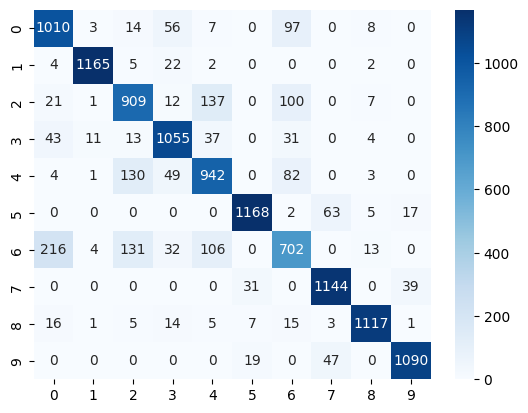

In [ ]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues")

## Regressão Linear

In [ ]:
# Criar o modelo Regressão Logística
logistic = LogisticRegression(max_iter=200, solver='liblinear')

# Treinar o modelo
history = logistic.fit(X_train_pca, y_train)

In [ ]:
# Fazer previsões no conjunto de validação
y_pred = logistic.predict(X_val_pca)
accuracy = accuracy_score(y_val, y_pred)
print(f"Acurácia no conjunto de validação: {accuracy:.4f}")

# Avaliar o modelo no conjunto de teste
test_pred = logistic.predict(X_test_pca)
y_test = np.round(y_test).astype(int)
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Acurácia no conjunto de teste: {test_accuracy:.4f}")

print(classification_report(y_val, y_pred))

Acurácia no conjunto de validação: 0.8419
Acurácia no conjunto de teste: 0.0948
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1195
           1       0.97      0.96      0.97      1200
           2       0.74      0.74      0.74      1187
           3       0.82      0.87      0.85      1194
           4       0.72      0.78      0.75      1211
           5       0.94      0.91      0.93      1255
           6       0.65      0.53      0.59      1204
           7       0.90      0.92      0.91      1214
           8       0.94      0.93      0.93      1184
           9       0.93      0.95      0.94      1156

    accuracy                           0.84     12000
   macro avg       0.84      0.84      0.84     12000
weighted avg       0.84      0.84      0.84     12000



<Axes: >

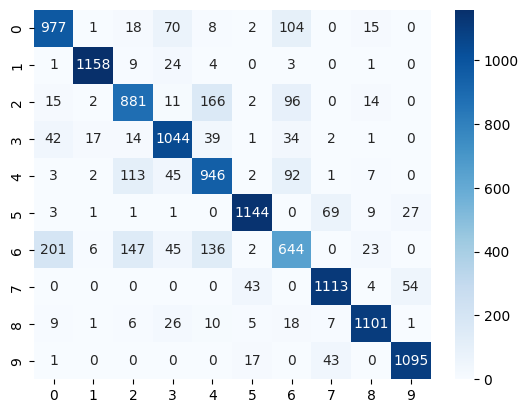

In [ ]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues")

## Árvore de Decisão

In [ ]:
# Criar o modelo Árvore de Decisão (Floresta Aleatória)
random_forest = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100)

# Treinar o modelo
random_forest.fit(X_train_pca, y_train)

RandomForestClassifier(criterion='entropy', max_depth=70)

In [ ]:
# Fazer previsões no conjunto de validação
y_pred = random_forest.predict(X_val_pca)
accuracy = accuracy_score(y_val, y_pred)
print(f"Acurácia no conjunto de validação: {accuracy:.4f}")

# Avaliar o modelo no conjunto de teste
test_pred = random_forest.predict(X_test_pca)
y_test = np.round(y_test).astype(int)
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Acurácia no conjunto de teste: {test_accuracy:.4f}")

print(classification_report(y_val, y_pred))

Acurácia no conjunto de validação: 0.8622
Acurácia no conjunto de teste: 0.0529
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1195
           1       1.00      0.96      0.98      1200
           2       0.77      0.80      0.79      1187
           3       0.86      0.90      0.88      1194
           4       0.77      0.82      0.80      1211
           5       0.96      0.91      0.93      1255
           6       0.72      0.54      0.62      1204
           7       0.92      0.91      0.92      1214
           8       0.93      0.96      0.94      1184
           9       0.90      0.96      0.92      1156

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000



<Axes: >

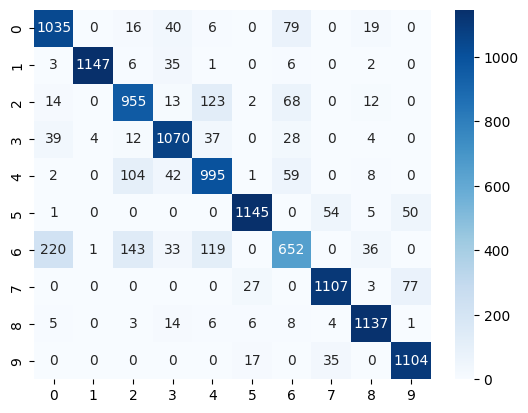

In [ ]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues")